<a href="https://colab.research.google.com/github/PreyPython123/Master-V24-Semiveiledet-Regresjon/blob/Databehandling-Pradeep/Bioco_Databehandling_av_ekstremverdier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lasting av nødvendige pakker og bibliotek

In [1]:
! pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.3-py3-none-any.whl size=190251 sha256=cf11c0ceffa4f0ad38833bab7d991a64dd12ac88ba2e71d4c37c440c352ea1d3
  Stored in directory: /root/.cache/pip/wheels/05/f8/db/124d43bec122d6ec0ab3713fadfe25ebed8af52ec561682b4e
Successfully built pyod


Importering av nødvendige pakker og bibliotek

In [2]:
import pandas as pd
import numpy as np
import copy
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns


from pyod.models.hbos import HBOS
from pyod.models.cblof import CBLOF

Importering av data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

# Velger første kolonne med dato og tid som index
behandlet_data = pd.read_csv('/content/drive/MyDrive/MasterV24/Bioco_data/manglende_data_behandlet_bioco_data.csv',
                             header=0,
                             sep=',',
                             index_col=0)

# Formatterer index til riktig format og datatype
behandlet_data.index = pd.to_datetime(behandlet_data.index,
                                      format='%Y-%m-%d %H:%M:%S')

Mounted at /content/drive


# Inspeksjon av mulige ekstremverdier

Henter prediktorer verdiene som skal undersøkes

In [11]:
prediktor_data = behandlet_data.iloc[:, 6:-4]
X = prediktor_data.values

In [10]:
prediktor_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29136 entries, 2022-10-31 17:37:00 to 2023-06-14 01:06:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   EnzymeType_E   29136 non-null  int64  
 1   RawMatPercent  29136 non-null  float64
 2   NIRfat         29136 non-null  float64
 3   NIRash         29136 non-null  float64
 4   NIRwater       29136 non-null  float64
 5   TT08           29136 non-null  float64
 6   TT20           29136 non-null  float64
 7   TT12           29136 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 2.0 MB


## Violin plot

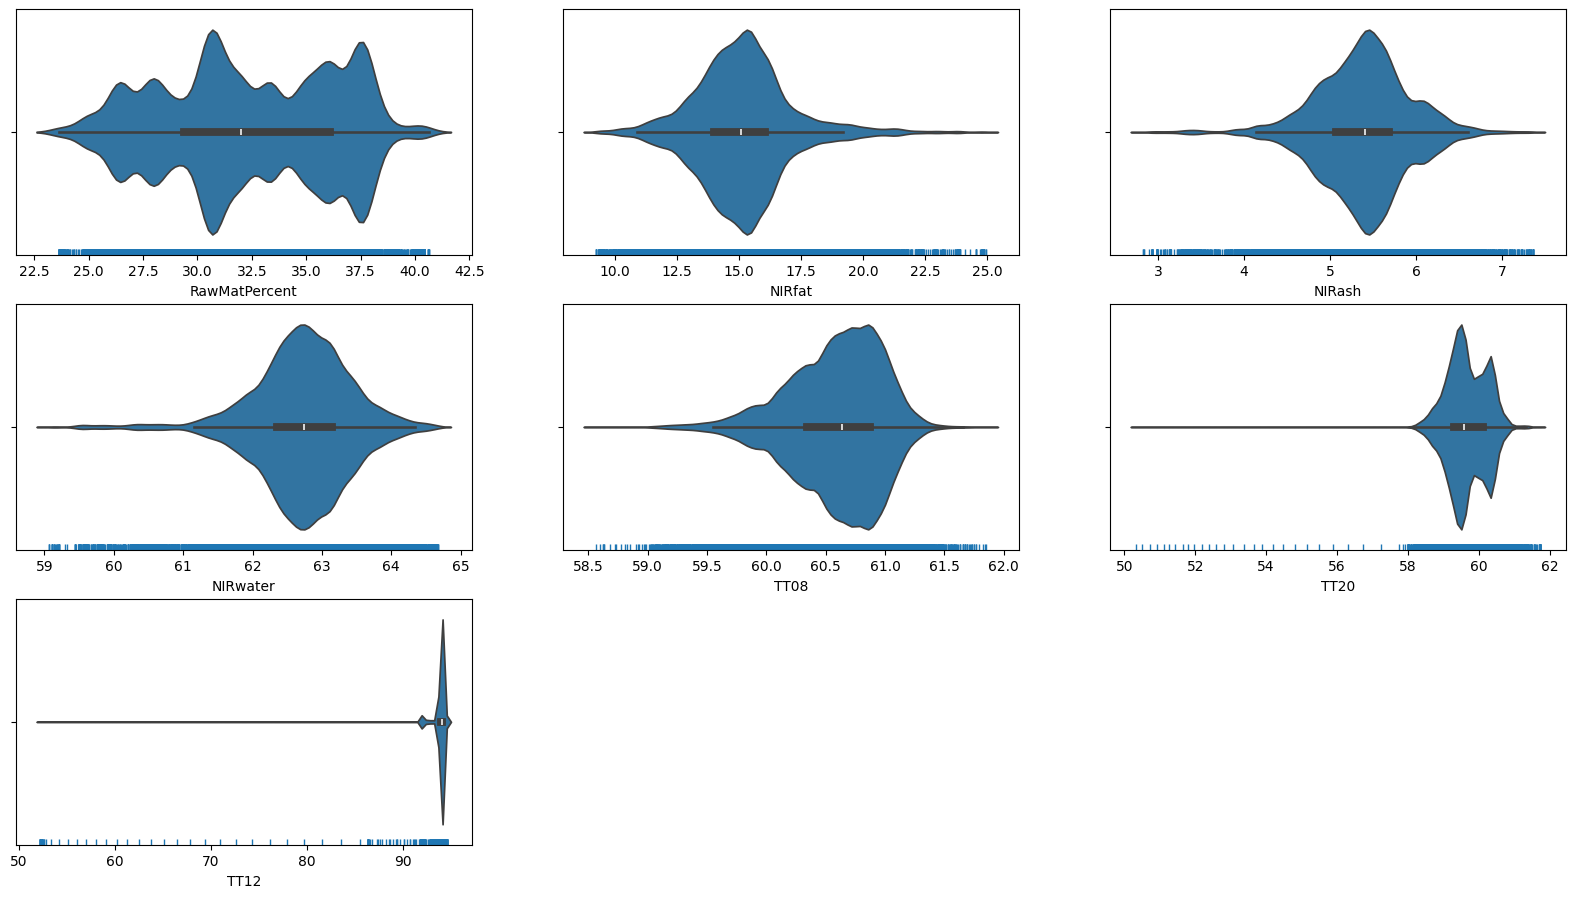

In [12]:
fig = plt.figure(figsize=(20,30))
antall_kolonnner = len(prediktor_data.columns)
rute_nett = fig.add_gridspec(8,3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), prediktor_data):
  if nummer % 3 == 0:
    n += 1
    i = 0
  ax = fig.add_subplot(rute_nett[n,i])
  sns.violinplot(x=indeks, data = prediktor_data)
  sns.rugplot(x=prediktor_data[indeks])
  i += 1

## PCA analyse

## Ekstremverdi inspeksjon med HBOS

<ipython-input-13-43a50cbceb4f>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)
<ipython-input-13-43a50cbceb4f>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,2)


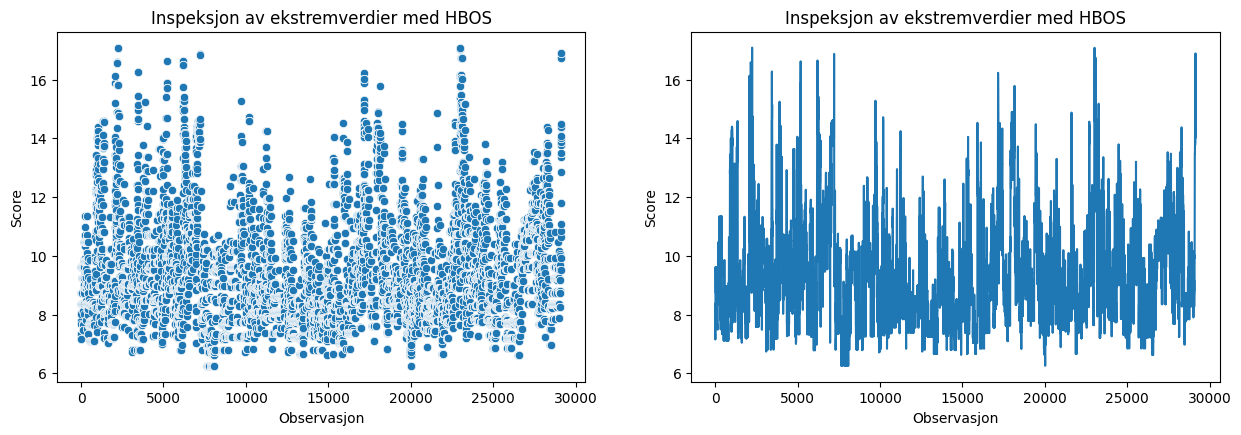

In [13]:
hbos = HBOS()
hbos.fit(X)

y_predikert = hbos.labels_
y_scores = hbos.decision_scores_

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
plt.subplot(2,2,1)
sns.scatterplot(data=y_scores)
plt.xlabel('Observasjon')
plt.ylabel('Score')
plt.title("Inspeksjon av ekstremverdier med HBOS")

plt.subplot(2,2,2)
plt.plot(list(y_scores))
plt.xlabel('Observasjon')
plt.ylabel('Score')
plt.title("Inspeksjon av ekstremverdier med HBOS")
plt.show()

## Ekstremsverdi inspeksjon med CBLOF

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-14-a8828af13051>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)
<ipython-input-14-a8828af13051>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,2)


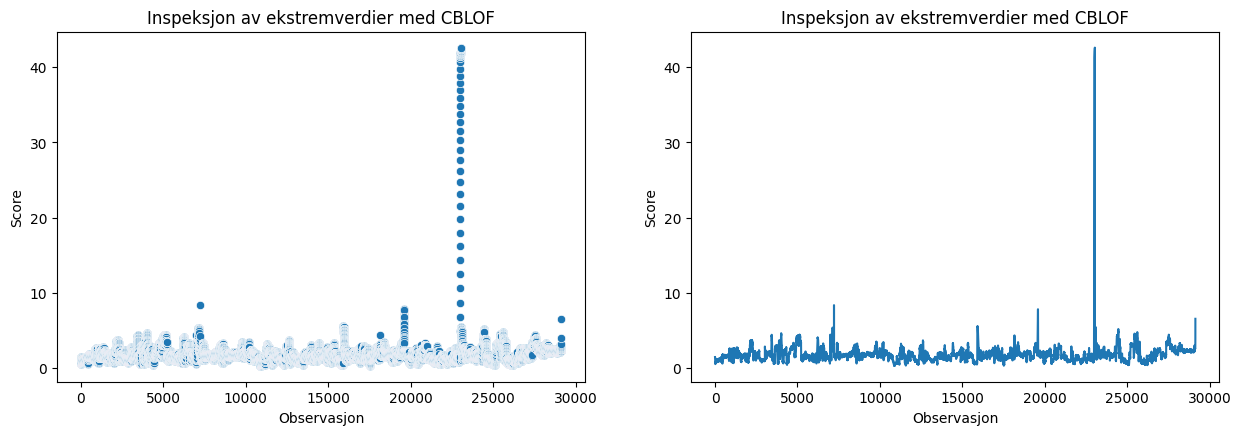

In [14]:
cblof = CBLOF()
cblof.fit(X)

y_predikert = cblof.labels_
y_scores = cblof.decision_scores_

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
plt.subplot(2,2,1)
sns.scatterplot(data=y_scores)
plt.xlabel('Observasjon')
plt.ylabel('Score')
plt.title("Inspeksjon av ekstremverdier med CBLOF")

plt.subplot(2,2,2)
plt.plot(list(y_scores))
plt.xlabel('Observasjon')
plt.ylabel('Score')
plt.title("Inspeksjon av ekstremverdier med CBLOF")
plt.show()

Ekstremverdi inspeksjon med DBSCAN

Lagring av data behandlet for ekstreme verdier som csv

In [15]:
behandlet_data.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/ekstremverdi_data_behandlet_bioco_data.csv')